In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline


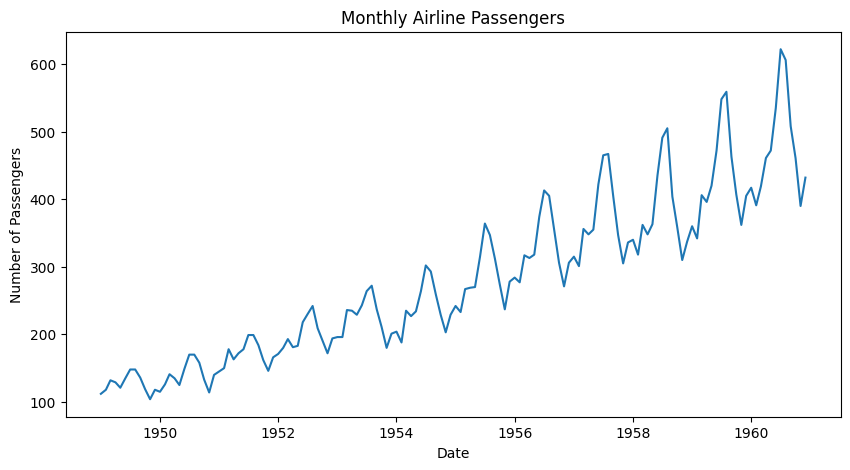

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
airline_data = pd.read_csv(url, index_col='Month', parse_dates=True)

# Plot the dataset
plt.figure(figsize=(10, 5))
plt.plot(airline_data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
ADF Statistic: -2.8292668241699923
p-value: 0.054213290283826474


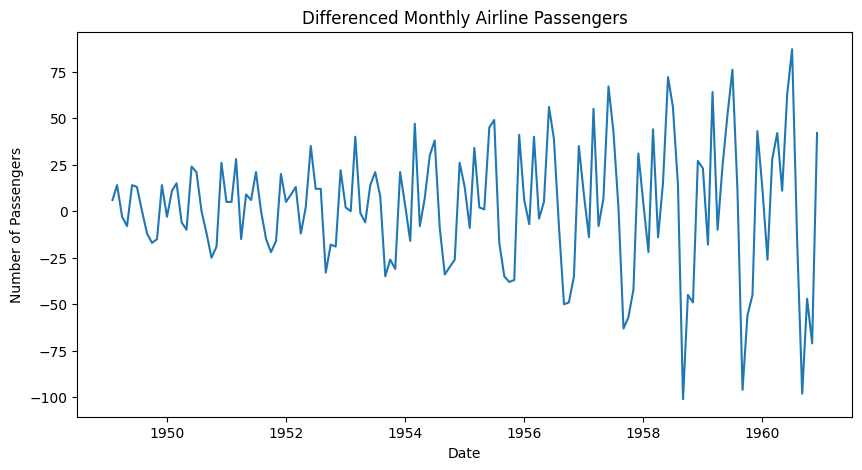

In [3]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(airline_data['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since the p-value is > 0.05, the data is not stationary. We need to difference it.
airline_data_diff = airline_data.diff().dropna()

# Check for stationarity again
result = adfuller(airline_data_diff['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(airline_data_diff)
plt.title('Differenced Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


In [4]:
# Fit the ARMA(1, 1) model
model = ARIMA(airline_data_diff, order=(1, 0, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -694.061
Date:                Mon, 22 Jul 2024   AIC                           1396.122
Time:                        11:03:26   BIC                           1407.973
Sample:                    02-01-1949   HQIC                          1400.937
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4507      3.441      0.712      0.476      -4.293       9.195
ar.L1         -0.4767      0.128     -3.735      0.000      -0.727      -0.227
ma.L1          0.8645      0.080     10.743      0.0

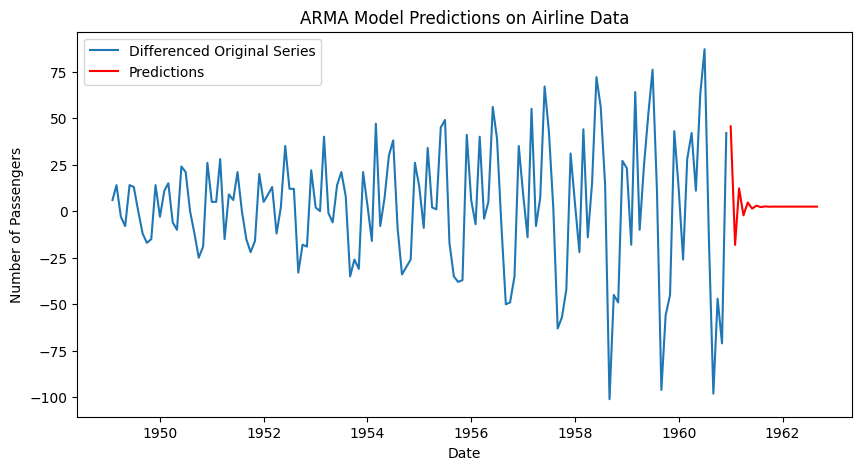

In [5]:
# Make predictions
start = len(airline_data_diff)
end = start + 20
predictions = model_fit.predict(start=start, end=end)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(airline_data_diff, label='Differenced Original Series')
plt.plot(predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARMA Model Predictions on Airline Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()
